In [0]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    plt.show()

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [75]:
X_train.shape

(60000, 28, 28)

In [76]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


Reshape

In [0]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [78]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


**Normalization**

In [0]:

X_train = X_train/255
X_test = X_test/255

**categorical encoding for target variable**

In [80]:
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


**SoftMax Classifier**

In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation
import warnings
warnings.filterwarnings("ignore") 

In [0]:
output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

**Model Building**

Single Layer

In [83]:
model = Sequential()
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 40us/step - loss: 1.2989 - acc: 0.6809 - val_loss: 0.8126 - val_acc: 0.8323
Epoch 2/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.7168 - acc: 0.8387 - val_loss: 0.6075 - val_acc: 0.8625
Epoch 3/20
60000/60000 [==============================] - 1s 24us/step - loss: 0.5876 - acc: 0.8585 - val_loss: 0.5259 - val_acc: 0.8740
Epoch 4/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.5260 - acc: 0.8682 - val_loss: 0.4803 - val_acc: 0.8811
Epoch 5/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.4886 - acc: 0.8746 - val_loss: 0.4504 - val_acc: 0.8865
Epoch 6/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.4628 - acc: 0.8794 - val_loss: 0.4291 - val_acc: 0.8899
Epoch 7/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.4437 - acc: 0.8833 - val_loss: 0.4127 - val_acc

MLP

In [84]:
# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_38 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_39 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [85]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 98us/step - loss: 2.2689 - acc: 0.2158 - val_loss: 2.2218 - val_acc: 0.3897
Epoch 2/20
60000/60000 [==============================] - 5s 82us/step - loss: 2.1767 - acc: 0.4667 - val_loss: 2.1214 - val_acc: 0.5874
Epoch 3/20
60000/60000 [==============================] - 5s 82us/step - loss: 2.0600 - acc: 0.5960 - val_loss: 1.9799 - val_acc: 0.6404
Epoch 4/20
60000/60000 [==============================] - 5s 82us/step - loss: 1.8958 - acc: 0.6491 - val_loss: 1.7860 - val_acc: 0.7110
Epoch 5/20
60000/60000 [==============================] - 5s 83us/step - loss: 1.6845 - acc: 0.6894 - val_loss: 1.5556 - val_acc: 0.7261
Epoch 6/20
60000/60000 [==============================] - 5s 83us/step - loss: 1.4547 - acc: 0.7209 - val_loss: 1.3269 - val_acc: 0.7417
Epoch 7/20
60000/60000 [==============================] - 5s 84us/step - loss: 1.2445 - acc: 0.7460 - val_loss: 1.1351 - val_acc

In [86]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.4586237694501877
Test accuracy: 0.8793


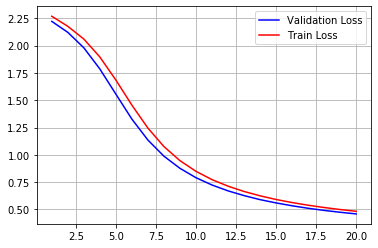

In [87]:
fig,ax = plt.subplots(1,1)
#ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


In [88]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 10)              

In [89]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.6656 - acc: 0.7930 - val_loss: 0.2922 - val_acc: 0.9159
Epoch 2/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.4298 - acc: 0.8693 - val_loss: 0.2609 - val_acc: 0.9240
Epoch 3/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.3872 - acc: 0.8837 - val_loss: 0.2384 - val_acc: 0.9285
Epoch 4/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.3606 - acc: 0.8922 - val_loss: 0.2210 - val_acc: 0.9351
Epoch 5/20
60000/60000 [==============================] - 8s 135us/step - loss: 0.3389 - acc: 0.8975 - val_loss: 0.2188 - val_acc: 0.9400
Epoch 6/20
60000/60000 [==============================] - 8s 134us/step - loss: 0.3180 - acc: 0.9035 - val_loss: 0.2060 - val_acc: 0.9408
Epoch 7/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.3082 - acc: 0.9066 - val_loss: 0.2034 -

Test score: 0.11205659993793815
Test accuracy: 0.967


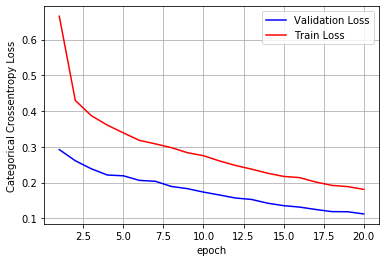

In [90]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

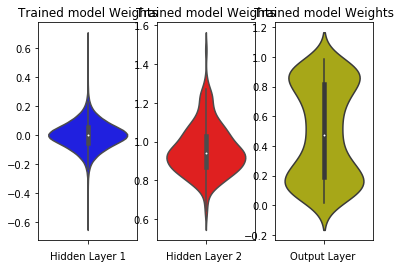

In [91]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**Hyper parameter Tuning**

In [0]:
from keras.optimizers import Adam,RMSprop,SGD
def best_hyperparameters(activ):

    model = Sequential()
    model.add(Dense(512, activation=activ, input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
    model.add(Dense(128, activation=activ, kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
    model.add(Dense(output_dim, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

In [0]:
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

activ = ['sigmoid','relu']

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = dict(activ=activ)


grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, Y_train)

In [94]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.976033 using {'activ': 'relu'}
0.974850 (0.000187) with: {'activ': 'sigmoid'}
0.976033 (0.003052) with: {'activ': 'relu'}
